In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/soory/anaconda3/DSINEURON/MINE/AIR/airfoil_self_noise.dat",sep="\t",header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

SyntaxError: invalid syntax (3560649745.py, line 1)

In [14]:
df.columns = ["Frequency","Angle of attack","length","velocity","Suction","pressure level"]

In [15]:
df.head()

,Frequency,Angle of attack,length,velocity,Suction,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [16]:
df.isnull().sum()

Frequency          0
Angle of attack    0
length             0
velocity           0
Suction            0
pressure level     0
dtype: int64

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=48)

In [19]:
X_train.head()

,Frequency,Angle of attack,length,velocity,Suction
1101,500,9.5,0.0254,31.7,0.004614
228,6300,0.0,0.2286,39.6,0.002535
38,1600,0.0,0.3048,39.6,0.003101
1431,800,12.3,0.1016,55.5,0.036823
809,630,8.4,0.0508,55.5,0.005449


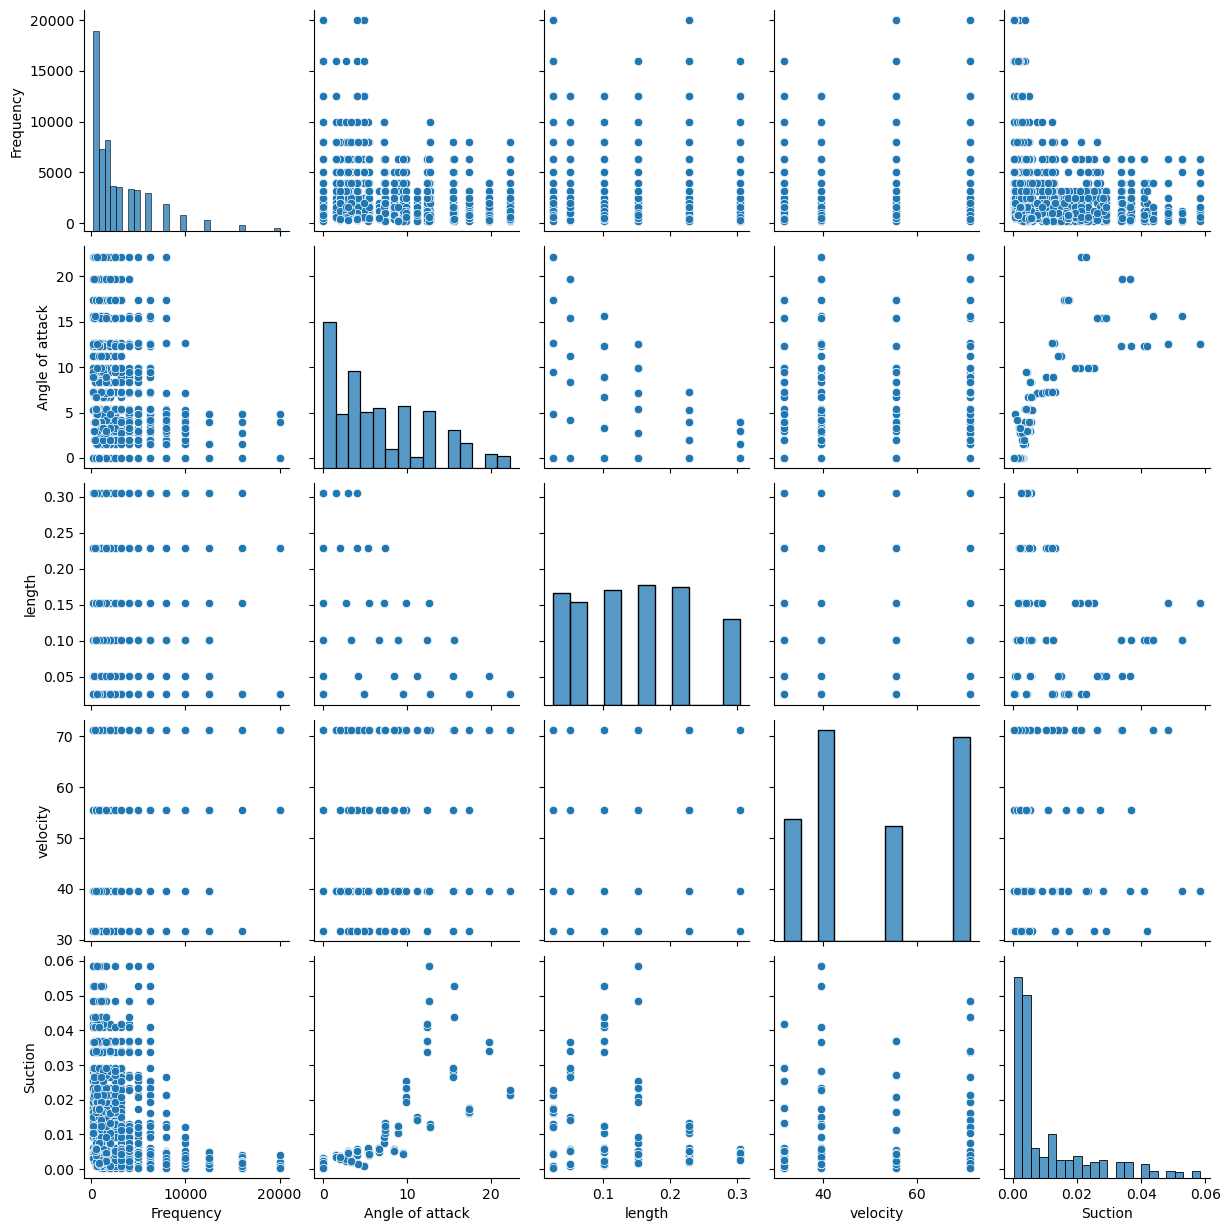

In [24]:
import seaborn as sns
sns.pairplot(X_train)

In [21]:
X_train.corr()

,Frequency,Angle of attack,length,velocity,Suction
Frequency,1.000000,-0.281634,0.013376,0.124488,-0.237766
Angle of attack,-0.281634,1.000000,-0.492553,0.077536,0.762404
length,0.013376,-0.492553,1.000000,-0.010400,-0.225398
velocity,0.124488,0.077536,-0.010400,1.000000,0.008488
Suction,-0.237766,0.762404,-0.225398,0.008488,1.000000


<Axes: xlabel='Frequency'>

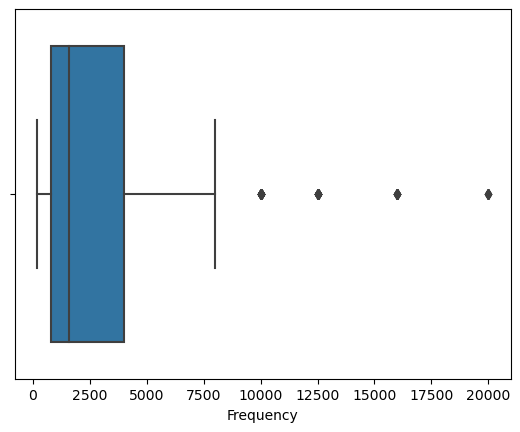

In [32]:
sns.boxplot(x=X_train['Frequency'])

<Axes: xlabel='Frequency', ylabel='pressure level'>

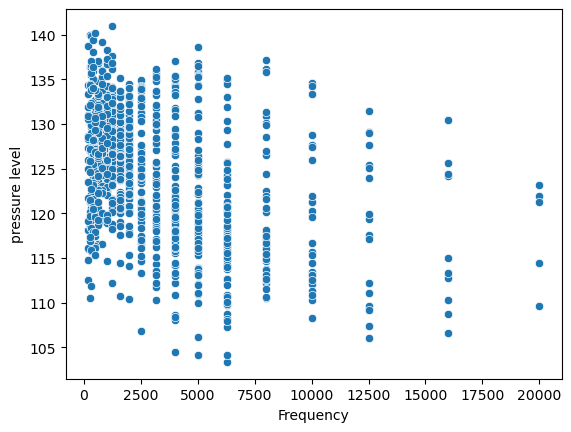

In [31]:
sns.scatterplot(x=X_train['Frequency'],y=y)

In [27]:
len(df['pressure level'].unique())

1456

<Axes: xlabel='pressure level'>

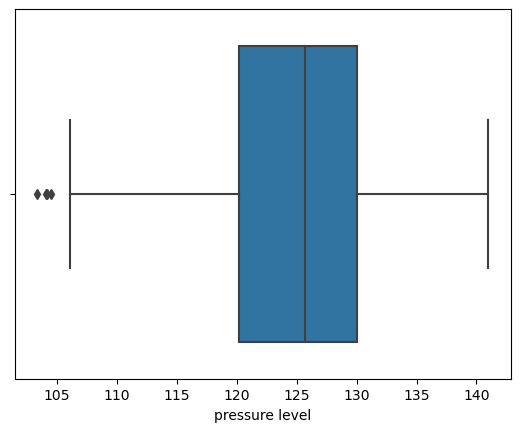

In [30]:
sns.boxplot(x=df['pressure level'])

In [33]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [35]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([126.83295774, 121.94829172, 125.47403313, 126.26028219,
       120.68310054, 123.14019261, 132.87503955, 126.48267669,
       121.89973303, 131.58236862, 115.94518929, 132.11622833,
       130.3665646 , 119.33478589, 129.59008399, 130.5327579 ,
       124.02035562, 129.38891859, 129.1654848 , 123.80525338,
       130.71838722, 129.81374545, 130.05847024, 132.72059678,
       133.51102261, 121.6051155 , 129.48771768, 131.91483386,
       124.46585707, 114.39630594, 125.74783742, 127.01883181,
       126.12061257, 125.24374939, 130.98670873, 124.66490444,
       122.06900555, 127.64247273, 127.45325661, 118.4077457 ,
       119.87861401, 123.28351766, 115.01211024, 120.47848234,
       126.60579779, 132.56198381, 122.9133923 , 130.79283978,
       135.2375241 , 118.16266041, 124.60555748, 130.02217189,
       121.07531349, 111.90821026, 126.24057921, 123.17170943,
       122.89430495, 125.45237329, 126.17116391, 120.98606956,
       119.23966676, 123.95933565, 122.14718107, 126.74